### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ABCD\AppData\Local\Continuum\anacon

### Read data

In [24]:
df=pd.read_csv('MUNLIV.csv')
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,421642,4,MissedShots,13089.600220,2348.800049,0.019184,Edinson Cavani,h,3294,OpenPlay,2020,Head,14770,Manchester United,Liverpool,2,4,2021-05-13 19:15:00,Aaron Wan-Bissaka,Aerial
1,421643,4,MissedShots,11937.600220,2956.800049,0.313387,Edinson Cavani,h,3294,OpenPlay,2020,RightFoot,14770,Manchester United,Liverpool,2,4,2021-05-13 19:15:00,NaN,BallRecovery
2,421644,9,Goal,12340.799561,2041.599976,0.038070,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14770,Manchester United,Liverpool,2,4,2021-05-13 19:15:00,Aaron Wan-Bissaka,Pass
3,421648,30,BlockedShot,12844.799561,3180.800049,0.028307,Scott McTominay,h,5560,FromCorner,2020,Head,14770,Manchester United,Liverpool,2,4,2021-05-13 19:15:00,Luke Shaw,End
4,421655,40,MissedShots,12513.600220,4691.200195,0.032955,Paul Pogba,h,1740,OpenPlay,2020,LeftFoot,14770,Manchester United,Liverpool,2,4,2021-05-13 19:15:00,Fred,Pass


### Basic exploration

In [3]:
df.shape[0]

35

In [4]:
df.h_a.value_counts()

h    18
a    17
Name: h_a, dtype: int64

### Countplot

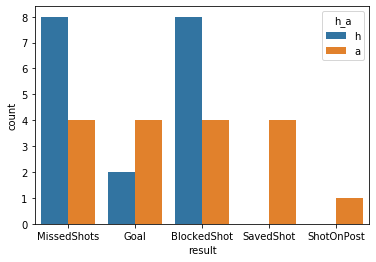

In [5]:
sns.countplot(x=df.result, hue=df.h_a)

### Basic plot

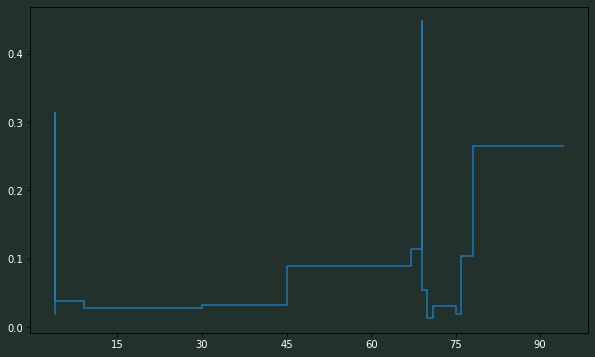

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

plt.step(df[df.h_a=='h'].minute, df[df.h_a=='h'].xG)

plt.axis(color='white')
plt.xticks([15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.show()

#### List of minutes and xg

In [10]:
list(df[df.h_a=='h'].minute)

[4, 4, 9, 30, 40, 45, 45, 67, 69, 69, 69, 70, 70, 71, 75, 76, 78, 94]

In [25]:
#initialize
min_h=[0]
xg_h=[0]
result_h=['start']
min_a=[0]
xg_a=[0]
result_a=['start']

#extend
min_h.extend(list(df[df.h_a=='h'].minute))
xg_h.extend(list(df[df.h_a=='h'].xG))
result_h.extend(list(df[df.h_a=='h'].result))

min_a.extend(list(df[df.h_a=='a'].minute))
xg_a.extend(list(df[df.h_a=='a'].xG))
result_a.extend(list(df[df.h_a=='a'].result))

#add last
t_max=max(90, max(df.minute))
min_h.append(t_max)
xg_h.append(0)
result_h.append('end')

min_a.append(t_max)
xg_a.append(0)
result_a.append('end')

In [16]:
xg_a

[0,
 0.06491980701684953,
 0.3181627094745636,
 0.045579109340906136,
 0.058842696249485016,
 0.039186488837003715,
 0.07450979202985764,
 0.5596401691436768,
 0.06608153879642488,
 0.013943244703114031,
 0.07671831548213959,
 0.4212280213832855,
 0.29827436804771423,
 0.3377325236797333,
 0.11234279721975328,
 0.037534546107053764,
 0.04242770001292229,
 0.4681112766265869,
 0]

In [26]:
#cumulative xg
xg_h=np.cumsum(xg_h)
xg_a=np.cumsum(xg_a)

In [18]:
xg_a

array([0.        , 0.06491981, 0.38308252, 0.42866163, 0.48750432,
       0.52669081, 0.6012006 , 1.16084077, 1.22692231, 1.24086556,
       1.31758387, 1.73881189, 2.03708626, 2.37481878, 2.48716158,
       2.52469613, 2.56712383, 3.0352351 , 3.0352351 ])

In [27]:
#make home and away dataframe
df_h=pd.DataFrame({'minute':min_h, 'xg':xg_h, 'result':result_h})
df_a=pd.DataFrame({'minute':min_a, 'xg':xg_a, 'result':result_a})

In [28]:
df_a

,minute,xg,result
0,0,0.000000,start
1,13,0.064920,BlockedShot
2,22,0.383083,SavedShot
3,25,0.428662,MissedShots
4,32,0.487504,SavedShot
5,33,0.526691,BlockedShot
6,33,0.601201,MissedShots
7,33,1.160841,Goal
8,34,1.226922,BlockedShot
9,35,1.240866,BlockedShot


In [29]:
df_h

,minute,xg,result
0,0,0.000000,start
1,4,0.019184,MissedShots
2,4,0.332572,MissedShots
3,9,0.370641,Goal
4,30,0.398949,BlockedShot
5,40,0.431904,MissedShots
6,45,0.463873,BlockedShot
7,45,0.508475,MissedShots
8,67,0.597807,Goal
9,69,0.711795,BlockedShot


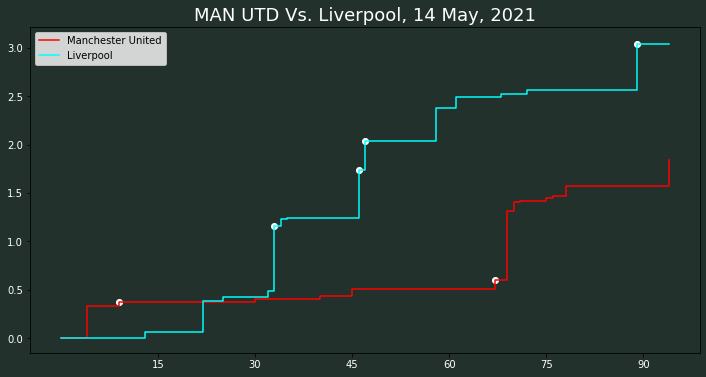

In [40]:
fig,ax=plt.subplots(figsize=(12,6))
plt.title("MAN UTD Vs. Liverpool, 14 May, 2021", size=18, color='white')
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

plt.step(df_h.minute, df_h.xg, color='red', label='Manchester United', where='post')
plt.step(df_a.minute, df_a.xg, color='aqua', label='Liverpool', where='post')

for i in range(df_h.shape[0]):
    if df_h.result[i]=='Goal':
        plt.scatter(df_h.minute[i], df_h.xg[i], color='white')
        
for i in range(df_a.shape[0]):
    if df_a.result[i]=='Goal':
        plt.scatter(df_a.minute[i], df_a.xg[i], color='white')

plt.axis(color='white')
plt.xticks([15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.legend()
plt.savefig('munliv.jpeg')
plt.show()

In [ ]:
def plotter(df):
    h_name=df.h_team.unique()[0]
    a_name=df.a_team.unique()[0]
    
    min_h=[0]
    xG_h=[0]
    min_a=[0]
    xG_a=[0]
    
    min_h.extend(list(df[df.h_a=='h'].minute))
    xG_h.extend(list(df[df.h_a=='h'].xG))
    min_a.extend(list(df[df.h_a=='a'].minute))
    xG_a.extend(list(df[df.h_a=='a'].xG))
    t_max=max(90, max(df.minute))
    min_h.append(t_max)
    min_a.append(t_max)
    
    goals=df[df.result=='Goal'].reset_index()
    own=df[df.result=='OwnGoal'].reset_index()
    
    cum_xG_a=cumulative_calc(xG_a)
    cum_xG_h=cumulative_calc(xG_h)
    
    fig,ax=plt.subplots(figsize=(10,6))
    fig.set_facecolor('#22312b')
    ax.patch.set_facecolor('#22312b')

    ax=plt.step(x=min_h, y=cum_xG_h, where='post', color='orange', label=h_name)
    ax=plt.step(x=min_a, y=cum_xG_a, where='post', color='red', label=a_name)
    for i in range(goals.shape[0]):
        if goals.h_a[i]=='a':
            time=goals.minute[i]
            idx=min_a.index(time)
            while min_a[idx]==min_a[idx+1]:
                idx=idx+1
            plt.scatter(x=time,y=cum_xG_a[idx], color='white')

        if goals.h_a[i]=='h':
            time=goals.minute[i]
            idx=min_h.index(time)
            while min_h[idx]==min_h[idx+1]:
                idx=idx+1
            plt.scatter(x=time,y=cum_xG_h[idx], color='white') 
    
    for i in range(own.shape[0]):
        if own.h_a[i]=='a':
            time=own.minute[i]
            time_opp=max([x for x in min_h if x<time])
            print(time)
            plt.scatter(x=time,y=cum_xG_h[min_h.index(time_opp)], color='red')
        if own.h_a[i]=='h':
            time=own.minute[i]
            time_opp=max([x for x in min_a if x<time])
            plt.scatter(x=time,y=cum_xG_a[min_h.index(time_opp)], color='red')            

    plt.xticks([15,30,45,60,75,90], color='white')
    plt.yticks(color='#FFFFFF')
    plt.tight_layout()
    plt.legend()
    plt.savefig('wolwhu.png')
    plt.show()